In [7]:
import matplotlib.pyplot as plt
import numpy as np
import collections
import nengo
from nengo.utils.matplotlib import rasterplot

In [8]:
import sys
sys.path.append('/Users/samart/Desktop/Neuro/SNNs/assemblies')

In [9]:
import brain

In [10]:
def diff(a, b):
    # Count occurrences of each element in both arrays
    count1 = collections.Counter(a)
    count2 = collections.Counter(b)
    # Calculate the difference in counts for each unique element
    total_diff = 0
    all_keys = set(count1.keys()).union(count2.keys())
    for key in all_keys:
        total_diff += abs(count1[key] - count2[key])
    
    return total_diff

## Assembly Creation in NEMO

In [9]:
N = 1000
k = 10
beta = 0.05
p = 0.01 


In [10]:
nemo = brain.Brain(p, save_winners=True)

nemo.add_stimulus(stimulus_name = 'STIM', size = k)
nemo.add_explicit_area("A", N, k, beta)
nemo.add_explicit_area("B", N, k, beta)

### Creating Stimulus Assembly into A

In [11]:
t = 5
for i in range(t-1):
    nemo.project({'STIM':["A"]}, {}, verbose=1)

Projecting STIM  and  into A
Projecting STIM  and  into A
Projecting STIM  and  into A
Projecting STIM  and  into A


In [12]:
Wsa = nemo.connectomes_by_stimulus['STIM']['A']

Wsa.shape

(1000,)

In [13]:
def d(a1, a2):
    return np.sum(np.array(a1) != np.array(a2))

diff = []
assembly = nemo.area_by_name['A'].saved_winners[-1]
for a in nemo.area_by_name['A'].saved_winners:
    diff.append(d(a, assembly))

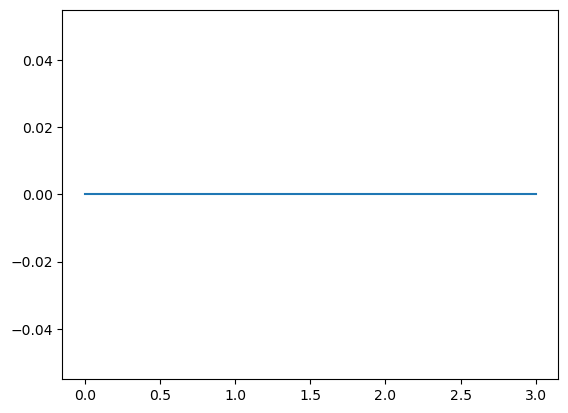

In [14]:
plt.plot(diff)
plt.show()

In [16]:
assembly

[26, 308, 530, 5, 9, 27, 38, 67, 71, 73]

In [15]:
Wsa[assembly]

array([2.4310124, 2.4310124, 2.4310124, 1.2155062, 1.2155062, 1.2155062,
       1.2155062, 1.2155062, 1.2155062, 1.2155062], dtype=float32)

In [23]:
print(np.flip(np.argsort(Wsa)[-k:]))
print(np.argsort(Wsa)[-k:])

[530  26 308   9  27  38  67   5  71  73]
[ 73  71   5  67  38  27   9 308  26 530]


In [18]:
asdf = 0
for i in np.argsort(Wsa)[-50:]:
    asdf += int(i not in assembly)
asdf

40

In [19]:
assembly

[26, 308, 530, 5, 9, 27, 38, 67, 71, 73]

In [20]:
np.array(nemo.area_by_name['A'].saved_winners[0]) == assembly

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [21]:
nemo.area_by_name['A'].saved_winners[0]

[26, 308, 530, 5, 9, 27, 38, 67, 71, 73]

In [22]:
for t, winners in enumerate(nemo.area_by_name['A'].saved_winners):
    print(f"At time {t+1}, winners were {winners}.\n\n")

At time 1, winners were [26, 308, 530, 5, 9, 27, 38, 67, 71, 73].


At time 2, winners were [26, 308, 530, 5, 9, 27, 38, 67, 71, 73].


At time 3, winners were [26, 308, 530, 5, 9, 27, 38, 67, 71, 73].


At time 4, winners were [26, 308, 530, 5, 9, 27, 38, 67, 71, 73].


At time 5, winners were [26, 308, 530, 5, 9, 27, 38, 67, 71, 73].


At time 6, winners were [26, 308, 530, 5, 9, 27, 38, 67, 71, 73].


At time 7, winners were [26, 308, 530, 5, 9, 27, 38, 67, 71, 73].


At time 8, winners were [26, 308, 530, 5, 9, 27, 38, 67, 71, 73].




### Projecting assembly into B as well 

In [23]:
N = 10000
k = 50
beta = 0.05
p = 0.01 

In [24]:
nemo = brain.Brain(p, save_winners=True)

nemo.add_stimulus(stimulus_name = 'STIM', size = k)
nemo.add_explicit_area("A", N, k, beta)
nemo.add_explicit_area("B", N, k, beta)

In [25]:
t = 5
for i in range(t):
    nemo.project({'STIM':["A"]}, {})
    if(t > 0):
        nemo.project({'STIM':["A"]}, {"A":["B"]})

In [26]:
sA = np.array(nemo.area_by_name['A'].winners)
sB = np.array(nemo.area_by_name['B'].winners)

In [27]:
for wA in nemo.area_by_name['A'].saved_winners:
    print(similar(wA, sA))

NameError: name 'similar' is not defined

In [93]:
for wB in nemo.area_by_name['B'].saved_winners:
    print(similar(wB, sB))

0
0
0
0
0


## Recreating Assembly Projection in Nengo

In [62]:
import nengo
from nengo.dists import Uniform, ScatteredHypersphere
from nengo.processes import WhiteSignal
from nengo.utils.ensemble import tuning_curves
from nengo.utils.ipython import hide_input
from nengo.utils.matplotlib import rasterplot


In [63]:
N = 200
k = 5
beta = 0.05
p = 0.01 


In [66]:
nemo = brain.Brain(p, save_winners=True)

nemo.add_stimulus(stimulus_name = 'STIM', size = k)
nemo.add_stimulus(stimulus_name = 'STIM2', size = k)
nemo.add_explicit_area("A", N, k, beta)
nemo.add_explicit_area("B", N, k, beta)

t = 3
for i in range(t):
    nemo.project({'STIM':["A"]}, {}, verbose=1)
    if(t > 0):
        nemo.project({'STIM':["A"]}, {"A":["B"]}, verbose=1)

sA = np.array(nemo.area_by_name['A'].winners)
sB = np.array(nemo.area_by_name['B'].winners)

for i in range(t):
    nemo.project({'STIM2':["A"]}, {}, verbose=1)
    if(t > 0):
        nemo.project({'STIM2':["A"]}, {"A":["B"]}, verbose=1)

sA2 = np.array(nemo.area_by_name['A'].winners)
sB2 = np.array(nemo.area_by_name['B'].winners)



Projecting STIM  and  into A
Projecting   and A into B
Projecting STIM  and  into A
Projecting STIM  and  into A
Projecting   and A into B
Projecting STIM  and  into A
Projecting STIM  and  into A
Projecting   and A into B
Projecting STIM  and  into A
Projecting STIM2  and  into A
Projecting   and A into B
Projecting STIM2  and  into A
Projecting STIM2  and  into A
Projecting   and A into B
Projecting STIM2  and  into A
Projecting STIM2  and  into A
Projecting   and A into B
Projecting STIM2  and  into A


In [67]:
sA, sA2

(array([26, 27, 73, 77, 91]), array([ 6, 39, 41, 52, 75]))

In [15]:
sA

array([26, 27, 73, 77, 91])

In [69]:
nemo.area_by_name['A'].saved_winners

[[26, 27, 73, 77, 91],
 [26, 27, 73, 77, 91],
 [26, 27, 73, 77, 91],
 [26, 27, 73, 77, 91],
 [26, 27, 73, 77, 91],
 [26, 27, 73, 77, 91],
 [6, 39, 41, 52, 75],
 [6, 39, 41, 52, 75],
 [6, 39, 41, 52, 75],
 [6, 39, 41, 52, 75],
 [6, 39, 41, 52, 75],
 [6, 39, 41, 52, 75]]

In [68]:
for wA in nemo.area_by_name['A'].saved_winners:
    print(diff(wA, sA))

0
0
0
0
0
0
10
10
10
10
10
10


In [70]:
for wB in nemo.area_by_name['B'].saved_winners:
    print(diff(wB, sB))

0
0
0
10
10
10


### Converting sparse binary vectors into Nengo values $\in \mathbb{R}^k$ 

- Each neuron has its own encoding vector or distribution, which specifies its tuning curve (what input current sets it firing) 
- As referenced in [NEF](https://compneuro.uwaterloo.ca/files/publications/stewart.2012d.pdf), value of activity vector is $$\vec{r} = G(\alpha E \cdot \vec{x} + \vec{b})$$
- In our case, $x$ represents the sparse binary vector (i.e. the activation of a specific Hebbian Assembly

In [109]:
def aligned(n_neurons, radius=0.9):
    intercepts = np.linspace(-radius, radius, n_neurons)
    encoders = np.tile([[1], [-1]], (n_neurons // 2, 1))
    intercepts *= encoders[:, 0]
    return intercepts, encoders

def generate_encoders(N, k, rad=1.0, method='ScatteredHypersphere'):
    intercepts = Uniform(-1.0, 0.9)
    match method.lower():
        case m if "hypersphere" in m:
            dist = ScatteredHypersphere(surface=True)
            encoders = dist.sample(N,k)
        case "gaussian":
            encoders = np.random.randn(N, k)
    return(intercepts, encoders)

In [110]:
sA, sB

(array([26, 27, 73, 77, 91]), array([ 3, 12, 14, 24, 30]))

In [111]:
sA2, sB2

(array([ 6, 39, 41, 52, 75]), array([ 0, 69, 74, 86, 87]))

- add non-linearity G? 
- learn rB? 

In [116]:
Ia, Ea = generate_encoders(N, k)
Ib, Eb = generate_encoders(2*N, k)
Ea = Ea + 0.1 * np.random.randn(N, k)
Eb = Eb + 0.1 * np.random.randn(2*N, k)

rA = Ea[sA].sum(axis=0)
rB = Eb[sB].sum(axis=0)
rA2 = Ea[sA2].sum(axis=0)
rB2 = Eb[sB2].sum(axis=0)

In [117]:
rA, rB

(array([-1.82181885, -0.25741709, -1.10241682,  0.82794475, -0.71078532]),
 array([ 0.28294335, -1.59197662, -0.11999742,  0.57131591, -0.84415982]))

In [118]:
rA2, rB2

(array([-0.22690929,  0.49406552, -1.65001212,  0.32268136, -0.07767186]),
 array([ 0.00618454,  1.78603894,  0.74512554, -1.16111609, -0.0925559 ]))

In [119]:
def input_signal(t):
    if(t < 10.0):
        return(rA)
    elif(t < 13.0):
        return(np.random.normal(loc=0.0, scale=0.707, size=k))
    elif(t < 20):
        return(rA2)
    else:
        return(rA)
    

        

In [120]:
net = nengo.Network()
with net:
    stim = nengo.Node(output=input_signal, size_out=k)
    stim_p = nengo.Probe(stim)
    
    A = nengo.Ensemble(n_neurons=N, dimensions=k, encoders=Ea, intercepts=Ia, label='A')#, gain=np.diag(np.ones(N)), bias=np.zeros(N))
    A_p = nengo.Probe(A)
    A_neurons = nengo.Probe(A.neurons)
    
    B = nengo.Ensemble(n_neurons=2*N, dimensions=k, encoders=Eb, intercepts=Ib, label='B')
    B_p = nengo.Probe(B)
    B_neurons = nengo.Probe(B.neurons)

    nengo.Connection(stim, A)
    conn = nengo.Connection(A, B, function=lambda t : 0.2 * np.random.random(k))
    

In [25]:
with nengo.Simulator(net) as sim:
    sim.run(20.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [121]:
def inhibit_error(t):
    if(t < 2.0): # inhibit initally 
        return(2.0)
    elif(t < 9.0): # turn on learning
        return(0.0)
    elif( 13 <= t <= 18):
        return(0.0)
    else: # inhibit after 10s
        return(2.0)
    

def target_signal(t):
    if(t < 10.0):
        return(rB)
    elif(t < 20):
        return(rB2)
    else:
        return(rB)
    


In [122]:
with net:
    target = nengo.Node(output=target_signal, size_out=k)
    target_p = nengo.Probe(target)

    error = nengo.Ensemble(N, k)
    error_p = nengo.Probe(error, synapse=0.03)
    # Error = actual - target = B - rB
    nengo.Connection(B, error)
    nengo.Connection(target, error, transform=-1)

    # Add the learning rule to the connection
    conn.learning_rule_type = nengo.PES()

    # Connect the error into the learning rule
    nengo.Connection(error, conn.learning_rule)
    # inhibit error signal after 10 seconds
    inhib = nengo.Node(inhibit_error)
    nengo.Connection(inhib, error.neurons, transform=[[-1]] * error.n_neurons) # -1 to ensure signal is inhibitory

In [123]:
with nengo.Simulator(net) as sim:
    sim.run(34.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

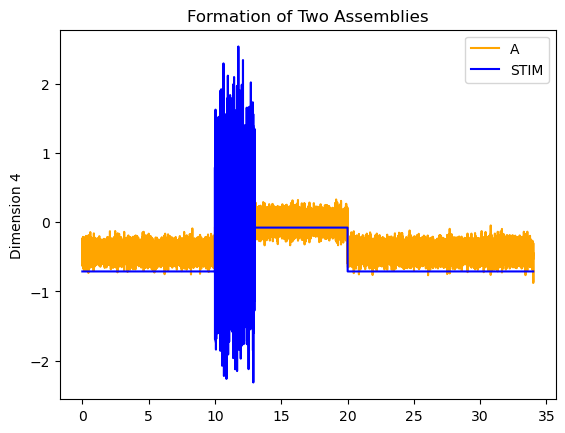

In [136]:
d = 4
plt.plot(sim.trange(), smooth_ts(sim.data[A_p].T[d]), label='A', color='orange')
plt.plot(sim.trange(), sim.data[stim_p].T[d], label='STIM', color='blue')


plt.ylabel(f"Dimension {d}")
plt.legend(loc="best")
plt.savefig("Stim12_Project_op")
plt.title(f"Formation of Two Assemblies")
plt.show()

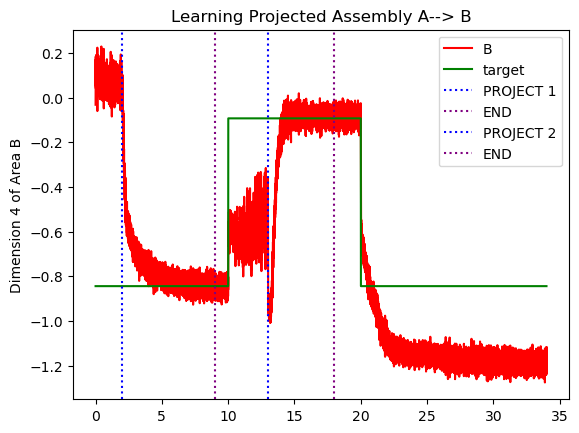

In [145]:
d = 4

plt.plot(sim.trange(), smooth_ts(sim.data[B_p].T[d], sigma=1.5), label='B', c='r')
plt.plot(sim.trange(), sim.data[target_p].T[d], label='target', c='g')

# Add vertical lines at t=3 and t=10
plt.axvline(x=2, color='blue', linestyle='dotted', label='PROJECT 1')
plt.axvline(x=9, color='purple', linestyle='dotted', label='END')

plt.axvline(x=13, color='blue', linestyle='dotted', label='PROJECT 2')
plt.axvline(x=18, color='purple', linestyle='dotted', label='END')

plt.title("Learning Projected Assembly A--> B")

plt.ylabel(f"Dimension {d} of Area B")
plt.legend(loc="best")
plt.savefig("project_op3.png")
plt.show()

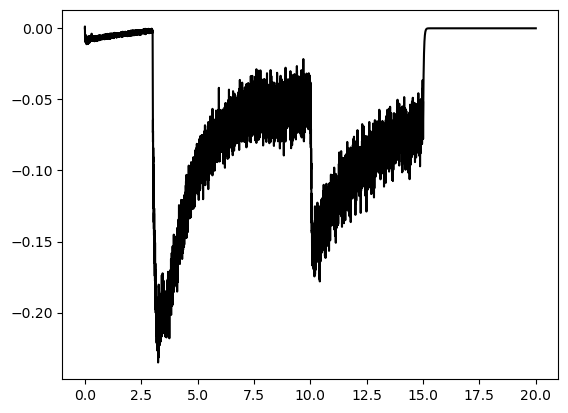

In [64]:
plt.plot(sim.trange(), sim.data[error_p].T[d], label='error', c='black')

In [23]:
def plot_res(sim, dims_to_observe, probes, trange=range(-100, 0), colors="k b r g".split(), save=False):
    D = len(dims_to_observe)
    plt.figure(figsize=(6*D, 8))
    for i, d in enumerate(dims_to_observe):
        plt.subplot(D, 1, i+1)
        for i, (name, probe) in enumerate(probes.items()):
            plt.plot(sim.trange()[trange], sim.data[probe].T[d][trange], c=colors[i], label=name)
        plt.ylabel(f"Dimension {d}")
        plt.legend(loc="best")
    plt.title("Learning To Project NEMO Assembly")
    if(save):
        plt.savefig('nengo_project.png')
    plt.show()

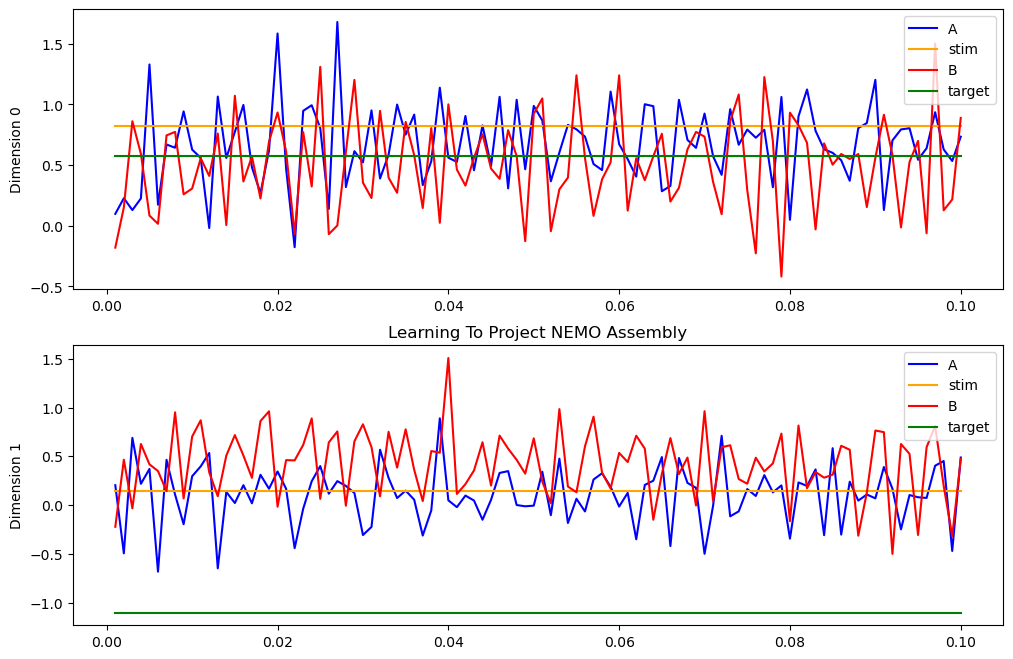

In [26]:
plot_res(sim, [0, 1], dict(A=A_p, stim=stim_p, B=B_p, target=target_p), colors="blue orange r g".split(), save=False, trange=range(0,100))

In [77]:
sim.data[error_p].shape

(20000, 5)

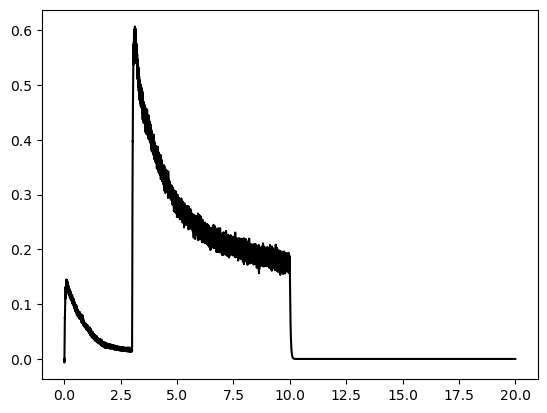

In [39]:
plt.plot(sim.trange(), sim.data[error_p].T[0], c='black', label='error')
plt.show()

# Experiment Two : Direct Connections

In [54]:
N = 200
k = 5
beta = 0.05
p = 0.1 

In [46]:
nemo = brain.Brain(p, save_winners=True)

nemo.add_stimulus(stimulus_name = 'STIM', size = k)
nemo.add_explicit_area("A", N, k, beta)
nemo.add_explicit_area("B", N, k, beta)

t = 3
for i in range(t):
    nemo.project({'STIM':["A"]}, {}, verbose=1)
    if(t > 0):
        nemo.project({'STIM':["A"]}, {"A":["B"]}, verbose=1)
        
sA = np.array(nemo.area_by_name['A'].winners)
sB = np.array(nemo.area_by_name['B'].winners)

Projecting STIM  and  into A
Projecting   and A into B
Projecting STIM  and  into A
Projecting STIM  and  into A
Projecting   and A into B
Projecting STIM  and  into A
Projecting STIM  and  into A
Projecting   and A into B
Projecting STIM  and  into A


In [52]:
Wab = nemo.connectomes['A']['B']

In [41]:
def create_area_connections(Na, Nb, seed=0, p=0.1):
    _rng = np.random.default_rng(seed=seed) 
    Wab = _rng.binomial(1, p, size=(Nb, Na)).astype(np.float32)
    Wba = _rng.binomial(1, p, size=(Na, Nb)).astype(np.float32)
    return(Wab, Wba)

def create_stim_connections(stim_size, N, seed=0, p=0.1):
    _rng = np.random.default_rng(seed=seed) 
    return(_rng.binomial(stim_size, p, size=N).astype(np.float32))

In [53]:


def input_signal(t):
    if(t < 10.0):
        return(rA)
    elif(t < 15.0):
        return(np.random.normal(loc=0.0, scale=0.707, size=k))
    else:
        return(rA)

with nengo.Network() as net:
    stim = nengo.Node(output=input_signal, size_out=k)
    stim_p = nengo.Probe(stim)
    
    A = nengo.Ensemble(N, dimensions=k, label='A')
    A_p = nengo.Probe(A)
    A_neurons = nengo.Probe(A.neurons)
    
    B = nengo.Ensemble(N, dimensions=k, label='B')
    B_p = nengo.Probe(B)
    B_neurons = nengo.Probe(B.neurons)

    # Neuron to neuron
    #Wab, _ = create_area_connections(A.num_neurons, B.num_neurons, seed=47, p=0.1)
    Wab = nemo.connectomes['A']['B']
    nengo.Connection(A.neurons, B.neurons, transform=Wab)

AttributeError: 'Ensemble' object has no attribute 'num_neurons'

In [ ]:
net = nengo.Network()
with net:
    stim = nengo.Node(output=input_signal, size_out=k)
    stim_p = nengo.Probe(stim)
    
    A = nengo.Ensemble(n_neurons=N, dimensions=k, encoders=Ea, intercepts=Ia, label='A')#, gain=np.diag(np.ones(N)), bias=np.zeros(N))
    A_p = nengo.Probe(A)
    A_neurons = nengo.Probe(A.neurons)
    
    B = nengo.Ensemble(n_neurons=N, dimensions=k, encoders=Eb, intercepts=Ib, label='B')
    B_p = nengo.Probe(B)
    B_neurons = nengo.Probe(B.neurons)

    nengo.Connection(stim, A)
    conn = nengo.Connection(A, B, function=lambda t : 0.2 * np.random.random(k))

    target = nengo.Node(output=rB)
    target_p = nengo.Probe(target)

In [ ]:
def input_signal(t):
    if(t < 10.0):
        return(rA)
    elif(t < 15.0):
        return(np.random.normal(loc=0.0, scale=0.707, size=k))
    else:
        return(rA)
    
def inhibit_error(t):
    if(t < 3.0): # inhibit initally 
        return(2.0)
    elif(t < 10.0): # turn on
        return(0.0)
    else: # inhibit after 10s
        return(2.0)

In [ ]:
with net:
    error = nengo.Ensemble(N, k)
    error_p = nengo.Probe(error, synapse=0.03)
    # Error = actual - target = B - rB
    nengo.Connection(B, error)
    nengo.Connection(target, error, transform=-1)

    # Add the learning rule to the connection
    conn.learning_rule_type = nengo.PES()

    # Connect the error into the learning rule
    nengo.Connection(error, conn.learning_rule)
    # inhibit error signal after 10 seconds
    inhib = nengo.Node(inhibit_error)
    nengo.Connection(inhib, error.neurons, transform=[[-1]] * error.n_neurons) # -1 to ensure signal is inhibitory